<a href="https://colab.research.google.com/github/Arthur-B/docs-ml/blob/master/rosenblatt_perceptron_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rosenblatt's perceptron


Implement the Rosenblatt's perceptron as described in Haykin, Chap. 1
We tried to keep the same structure ("update weight", "train") as used in the
regression section.

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation

At first we have to generate some data to classify. We define two categories, 1 and -1, each following a Gaussian distribution.


In [2]:
# First Gaussian distribution

n1 = 200    # Number of points in first category
x1, y1 = -5, 5              # Mean
x1_std, y1_std = 3, 1.5     # Standard deviation

X1 = np.stack((np.random.normal(x1, x1_std, n1),
               np.random.normal(y1, y1_std, n1)), axis=1)
y1 = np.ones(n1)    # First category is 1

# Second distribution

n2 = 200
x2, y2 = 10, 10
x2_std, y2_std = 3, 3

X2 = np.stack((np.random.normal(x2, x2_std, n2),
               np.random.normal(y2, y2_std, n2)), axis=1)
y2 = np.ones(n2) * -1   # Second category is -1

Let's have a look at how the data look:

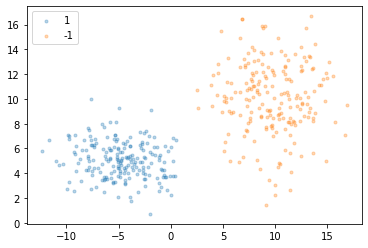

In [5]:
fig1, ax1 = plt.subplots()

ax1.scatter(X1[:, 0], X1[:, 1], marker='.', alpha=0.3, label='1')
ax1.scatter(X2[:, 0], X2[:, 1], marker='.', alpha=0.3, label='-1')
ax1.legend()

plt.show()

Then, we concatenate them together in one general dataset with $X$ as the input and $y$ as the output.

In [7]:
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

## Classification

We implement the algorithm to update the weights.

First, if the point is on the properly categorized well, we do not change the weights: no reason to change anything if the data is categorized properly. Second, if the point is wrongly categorized, we adjust the weights, according to a learning rate $\eta$.

\begin{align}
& (1) &\mathbf{w}(n+1) = \mathbf{w}(n) - \eta(n)\mathbf{x}(n) & \text{ if }  \mathbf{w}^T(n)\mathbf{x}(n) > 0 \text{ and } \mathbf{x}(n) \in \mathscr{C_2} \\
& (2) &\mathbf{w}(n+1) = \mathbf{w}(n) + \eta(n)\mathbf{x}(n) & \text{ if } \mathbf{w}^T(n)\mathbf{x}(n) \leq 0 \text{ and } \mathbf{x}(n) \in \mathscr{C_1}
\end{align}

Therefore, the function will try to classify

In [6]:
def update_weights(X, y, w, alpha):
    """
    Follows equation 1.3 and 1.6 to update the weight vector w.
    """

    for i in range(len(X)):
        # Define the vector according to the textbook
        x_temp = np.array([[1], [X[i, 0]], [X[i, 1]]]).T

        # Combiner output (Eq. 1.3)
        v = np.matmul(x_temp, w.T)

        # Eq 1.6: weight update
        if (v > 0) and (y[i] == -1):
            w -= alpha * x_temp
        elif (v <= 0) and (y[i] == 1):
            w += alpha * x_temp
    return w

After defining the rules to update the weights, we define the general training loop. We will Given the training data $(\mathbf{X}, \mathbf{y})$

In [8]:
def train(X, y, w, alpha, epochs):
    for i in range(epochs):
        w = update_weights(X, y, w, alpha)
        if i % 100 == 0:
            print("EPOCH: ", i)
    return w

In [9]:
# Define the vector according to the textbook
w = np.array([[0.0], [0.0], [0.0]]).T
alpha = 1e-4    # Learning rate
epochs = 1000

In [10]:
w = train(X, y, w, alpha, epochs)
w = w.squeeze()     # Get rid of unwanted dimensions

EPOCH:  0
EPOCH:  100
EPOCH:  200
EPOCH:  300
EPOCH:  400
EPOCH:  500
EPOCH:  600
EPOCH:  700
EPOCH:  800
EPOCH:  900


## Graph

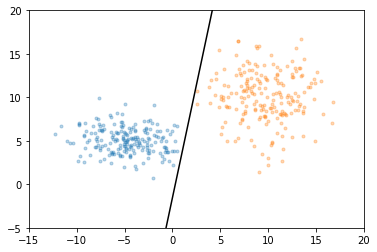

In [14]:
# Determine the boundary line

x_plot = np.linspace(-10, 10)
y_plot = -(w[1] * x_plot + w[0]) / w[2]

# Make the figure

fig2, ax2 = plt.subplots()

ax2.scatter(X1[:, 0], X1[:, 1], marker='.', alpha=0.3)
ax2.scatter(X2[:, 0], X2[:, 1], marker='.', alpha=0.3)
ax2.plot(x_plot, y_plot, 'k')

ax2.set(xlim=[-15, 20], ylim=[-5, 20])

plt.show()

## Review

In this first example